# Introduction

One of the main parts of our app is the recipe tab that allows users with a subscription to view numerous recipes provided by the recipe team. Users can search for recipes, view preparation details and save recipes as favorites. The recipe team wonders whether there are features that distinguish successful recipes from less successful recipes and asks for your help.

You are provided with an aggregated data set containing data on the recipes viewed by the users. Some of the fields contain text, for example recipe title, description, instructions, etc. related to the recipe.


# 1. Data Loading


In [10]:
# Read libraries
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [11]:
# Define the path to the marketing data file
recipes_file = r'./case-study-task-recipes.parquet'

# Load the parquet file into a DataFrame
df = pd.read_parquet(recipes_file, engine="pyarrow")


# 2. Data Overview

- Use `.info()` to undestand the dtypes

- Use `.head()`. to understand structure and contents

- Use `.describe()`. to see descriptive statistics
    
- Look for null values

In [12]:
# Get a summary of the DataFrame (columns, non-null counts, data types)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64400 entries, 0 to 64399
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             64400 non-null  datetime64[ns]
 1   recipe_id        64400 non-null  object        
 2   no_hits          64400 non-null  int64         
 3   no_sessions      64400 non-null  int64         
 4   name             64400 non-null  object        
 5   description      64400 non-null  object        
 6   preparationtime  64400 non-null  int64         
 7   difficulty       64400 non-null  object        
 8   steps            64400 non-null  int64         
 9   instructions     64400 non-null  object        
 10  tags             64400 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(6)
memory usage: 5.4+ MB


In [13]:
# Display the first 5 rows of the DataFrame to understand its structure and contents
df.head()

,date,recipe_id,no_hits,no_sessions,name,description,preparationtime,difficulty,steps,instructions,tags
0,2023-01-08,1052,15,13,Mashed Avocado & Peas with Cauliflower,Our creamy Mashed Avocado & Peas with Cauliflo...,35,easy,8,"[Preheat the oven to 360°F (180°C)., Start by ...","low_carb,dinner,lunch,vegan,vegetarian,gluten_..."
1,2023-01-25,1052,12,10,Mashed Avocado & Peas with Cauliflower,Our creamy Mashed Avocado & Peas with Cauliflo...,35,easy,8,"[Preheat the oven to 360°F (180°C)., Start by ...","low_carb,dinner,lunch,vegan,vegetarian,gluten_..."
2,2023-01-26,1052,13,11,Mashed Avocado & Peas with Cauliflower,Our creamy Mashed Avocado & Peas with Cauliflo...,35,easy,8,"[Preheat the oven to 360°F (180°C)., Start by ...","low_carb,dinner,lunch,vegan,vegetarian,gluten_..."
3,2023-01-19,1052,11,9,Mashed Avocado & Peas with Cauliflower,Our creamy Mashed Avocado & Peas with Cauliflo...,35,easy,8,"[Preheat the oven to 360°F (180°C)., Start by ...","low_carb,dinner,lunch,vegan,vegetarian,gluten_..."
4,2023-01-09,1052,14,14,Mashed Avocado & Peas with Cauliflower,Our creamy Mashed Avocado & Peas with Cauliflo...,35,easy,8,"[Preheat the oven to 360°F (180°C)., Start by ...","low_carb,dinner,lunch,vegan,vegetarian,gluten_..."


In [14]:
# Print an example of entry in the df
for i in range(len(df.columns)):
    print(df.columns[i],df.iloc[1,i],"\n")

date 2023-01-25 00:00:00 

recipe_id 1052 

no_hits 12 

no_sessions 10 

name Mashed Avocado & Peas with Cauliflower 

description Our creamy Mashed Avocado & Peas with Cauliflower is a great dish that can even be eaten cold. The mash doesn't need to be cooked and the oven-roasted veggies are also delicious cold. The added lemon juice and mint will give the dish an extra kick of freshness. 

preparationtime 35 

difficulty easy 

steps 8 

instructions ['Preheat the oven to 360°F (180°C).'
 'Start by separating the cauliflower into florets. Place the florets in a casserole dish, drizzle with the olive oil and season with turmeric, cumin and salt. Cook the cauliflower on the middle rack for approx. 30 minutes.'
 'In the meantime, bring a pot of water to a boil and cook the edamame beans for approx. 5 minutes.'
 'Heat some water in a water boiler and pour over the peas. Allow to thaw for approx. 5 minutes.'
 'Cut the avocado in half, pit, peel and mash with a fork. Add the peas and cont

In [15]:
# Display descriptive statistics for numerical columns
print("## Descriptive Statistics:")
df.describe()

## Descriptive Statistics:


,no_hits,no_sessions,preparationtime,steps
count,64400.000000,64400.000000,64400.00000,64400.000000
mean,77.484425,66.001910,40.19618,6.517857
std,194.562867,160.659299,53.41458,2.468603
min,1.000000,1.000000,2.00000,1.000000
25%,10.000000,9.000000,17.00000,5.000000
50%,23.000000,20.000000,30.00000,6.000000
75%,59.000000,51.000000,45.00000,8.000000
max,4690.000000,3728.000000,1285.00000,16.000000


In [16]:
# Check for null values in the DataFrame
null_counts = df.isnull().sum()
print("## Null Values Count per Column:\n")
print(null_counts)

## Null Values Count per Column:

date               0
recipe_id          0
no_hits            0
no_sessions        0
name               0
description        0
preparationtime    0
difficulty         0
steps              0
instructions       0
tags               0
dtype: int64


In [17]:
# Test to verify if there are no null values in the entire DataFrame
if df.isnull().sum().sum() == 0:
    print("## All clear! There are no null values in the DataFrame.")
else:
    raise ValueError("There are null values in the DataFrame!")

## All clear! There are no null values in the DataFrame.


> After understanding the dataframe, we can proceed to data transformation.


# 3. Data Transformation

## Check if there are variations of the same recipe

In [18]:
# Check if 'instructions' or 'tags' contain the "|" character. 
# Check if it is safe to replace the "," separator in the arrays.

columns_to_check = ['instructions', 'tags']

for column in columns_to_check:
    if column in df.columns:
        contains_pipe = df[column].astype(str).str.contains(r'\|').any()
        if contains_pipe:
            print(f"The column '{column}' contains the '|' character.")
        else:
            print(f"The column '{column}' does not contain the '|' character.")

The column 'instructions' does not contain the '|' character.
The column 'tags' does not contain the '|' character.


In [19]:
# Flatten arrays/lists into a pipe-separated string
df['tags'] = df['tags'].apply(
    lambda x: '|'.join(x) if isinstance(x, (list, np.ndarray)) else x
)


df['instructions'] = df['instructions'].apply(
    lambda x: '|'.join(x) if isinstance(x, (list, np.ndarray)) else x
)

In [20]:
# Check if 'steps', 'instructions', or 'tags' contain the "|" character
columns_to_check = ['instructions', 'tags']

for column in columns_to_check:
    if column in df.columns:
        contains_pipe = df[column].astype(str).str.contains(r'\|').any()
        if contains_pipe:
            print(f"The column '{column}' contains the '|' character.")
        else:
            print(f"The column '{column}' does not contain the '|' character.")

The column 'instructions' contains the '|' character.
The column 'tags' does not contain the '|' character.


In [21]:
# Group by recipe_id to identify variations in columns
unique_recipes = df.groupby('recipe_id').agg({
    'name': 'nunique',
    'description': 'nunique',
    'preparationtime': 'nunique',
    'difficulty': 'nunique',
    'steps': 'nunique',
    'instructions': 'nunique',
    'tags': 'nunique'
}).reset_index()

In [22]:
unique_recipes.describe()

,name,description,preparationtime,difficulty,steps,instructions,tags
count,2120.0,2120.0,2120.0,2120.0,2120.0,2120.0,2120.0
mean,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,1.0,1.0,1.0,1.0,1.0,1.0,1.0
50%,1.0,1.0,1.0,1.0,1.0,1.0,1.0
75%,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0


><br> Since the min,mean and max are 1, we can conclude that there are no variations in columns for the same `recipe_id`<br><br>

## Aggregate the metrics at recipe level

In [23]:
# Aggregate no_hits and no_sessions, keeping other columns
aggregated_df = df.groupby('recipe_id').agg({
    'name': 'first',
    'description': 'first',
    'preparationtime': 'first',
    'difficulty': 'first',
    'steps': 'first',
    'instructions': 'first',
    'tags': 'first',
    'no_hits': 'sum',
    'no_sessions': 'sum'
}).reset_index()

In [24]:
# Count the number of tags per recipe in the tags column
aggregated_df['no_tags'] = aggregated_df['tags'].apply(
    lambda x: len(x.split(',')) if isinstance(x, str) and x.strip() else 0
)

In [25]:
# Check for missing values
print(aggregated_df.isnull().sum())

recipe_id          0
name               0
description        0
preparationtime    0
difficulty         0
steps              0
instructions       0
tags               0
no_hits            0
no_sessions        0
no_tags            0
dtype: int64


In [26]:
# Display the aggregated DataFrame
aggregated_df

,recipe_id,name,description,preparationtime,difficulty,steps,instructions,tags,no_hits,no_sessions,no_tags
0,1,Vegetarian Pizza with Cauliflower Crust,A pizza made entirely without flour? That can'...,55,normal,7,Remove the leaves from the cauliflower; wash a...,"low_carb,lunch,dinner,vegetarian,gluten_free,c...",1225,1122,8
1,10,Sugar-free Bottomless Cheesecake,This cheesecake can be prepared quickly and o...,180,hard,9,Coat a springform pan (Ø 18 cm / 7.1 inch) wit...,"low_carb,vegetarian,gluten_free,sugar_free,des...",6621,5897,8
2,100,Green Spinach Smoothie,"When you first hear it, a green smoothie might...",5,easy,3,"Wash the spinach and spin dry. Then, place it ...","low_calorie,low_fat,breakfast,snack,vegan,glut...",7170,6239,18
3,1000,Strawberry Nice Cream with Granola,"Nice cream, made with frozen and puréed banana...",20,easy,4,Remove the bananas from the freezer and let th...,"low_fat,breakfast,vegan,vegetarian,lactose_fre...",503,456,12
4,1001,Jackfruit Tacos,Even meat eaters won't say no to these delicio...,40,normal,9,Peel the onion and garlic and cut the onion in...,"dinner,lunch,vegan,vegetarian,lactose_free,fru...",1790,1535,8
...,...,...,...,...,...,...,...,...,...,...,...
2115,995,Bacon & Spinach Omelette,"Packed with delicious ingredients, our Bacon &...",20,normal,8,Preheat the oven to 360°F (180°C).|In an oven-...,"low_carb,breakfast,dinner,lunch,gluten_free,su...",444,390,9
2116,996,Meatloaf with Mashed Potatoes & Green Beans,Meatloaf with Mashed Potatoes & Green Beans is...,70,easy,11,Preheat the oven to 360°F (180°C).|Peel and fi...,"dinner,lunch,meat,vegetables,400kcal,easy",4600,3750,6
2117,997,Buffalo Cauliflower Wings,"If you love spicy foods, you definitely have t...",60,normal,10,Preheat the oven to 320°F (160°C).|Separate th...,"dinner,lunch,vegan,vegetarian,lactose_free,veg...",531,476,7
2118,998,One-Pot Curry Pasta,It's always amazing how quick and uncomplicate...,35,easy,7,Peel the onion and garlic and cut the onion in...,"dinner,lunch,vegan,vegetarian,lactose_free,sug...",7624,6309,10


## Choose the y (no_hits vs no_sessions)

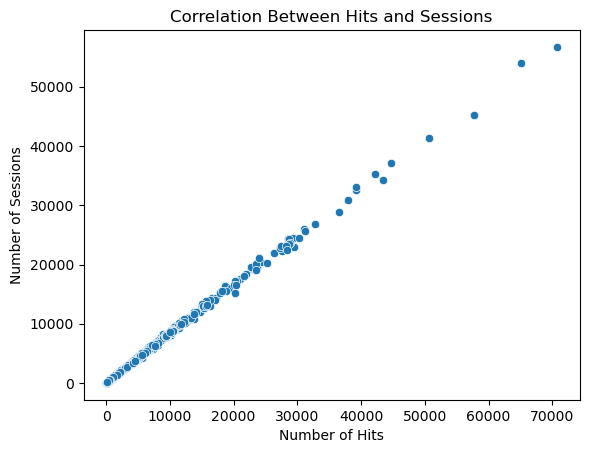

In [27]:
sns.scatterplot(data=aggregated_df, x='no_hits', y='no_sessions')
plt.title("Correlation Between Hits and Sessions")
plt.xlabel("Number of Hits")
plt.ylabel("Number of Sessions")
plt.show()

> <br>Since sessions and hits and highly correlated, we can focus on only one. <br>
We will keep the analysis focusing on views (no_hits) <br><br>

# 4. Data Analysis

## Analyze numeric variables

In [28]:
# Check the data types
print(aggregated_df.dtypes)

recipe_id          object
name               object
description        object
preparationtime     int64
difficulty         object
steps               int64
instructions       object
tags               object
no_hits             int64
no_sessions         int64
no_tags             int64
dtype: object


In [29]:
numeric_cols = ['preparationtime','steps','no_tags','no_hits']
numeric_df = aggregated_df[numeric_cols]

### Scatter plots

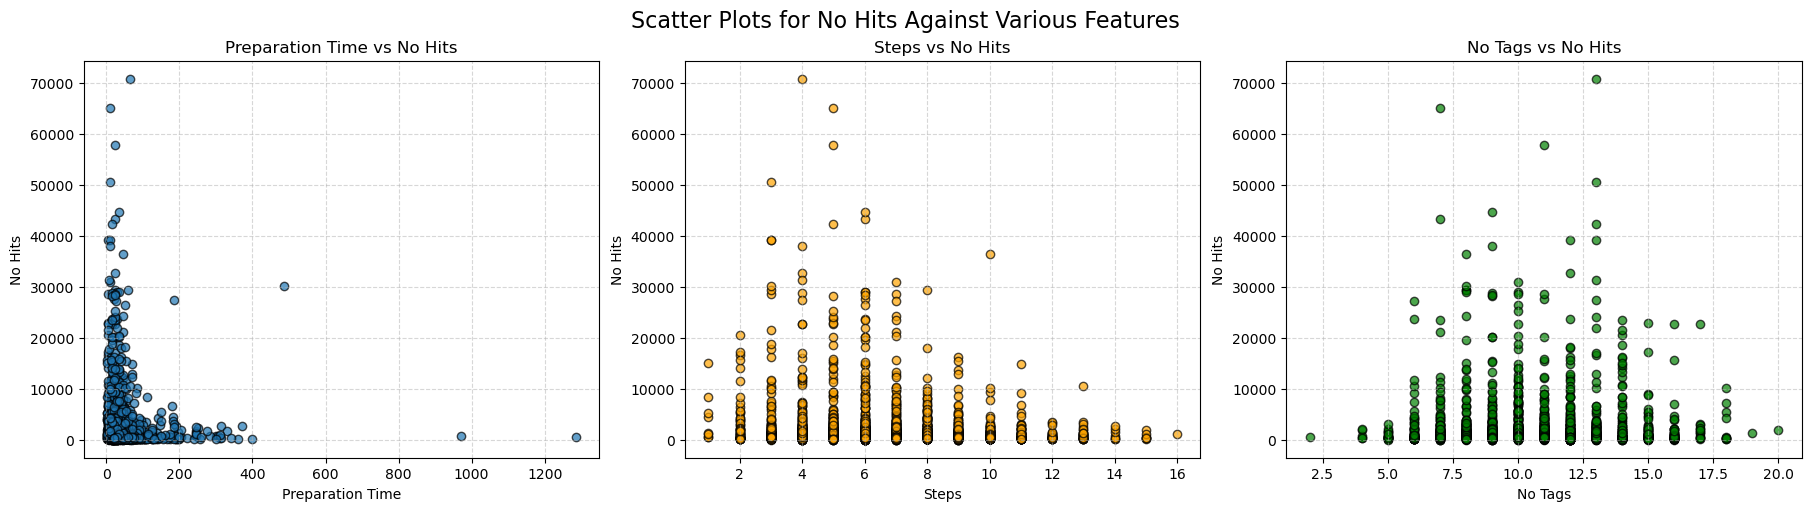

In [30]:
# Create the figure and subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 5), constrained_layout=True)

# Scatter plot 1: preparationtime vs no_hits
axs[0].scatter(numeric_df['preparationtime'], numeric_df['no_hits'], alpha=0.7, edgecolor='k')
axs[0].set_title('Preparation Time vs No Hits', fontsize=12)
axs[0].set_xlabel('Preparation Time', fontsize=10)
axs[0].set_ylabel('No Hits', fontsize=10)
axs[0].grid(True, linestyle='--', alpha=0.5)

# Scatter plot 2: steps vs no_hits
axs[1].scatter(numeric_df['steps'], numeric_df['no_hits'], alpha=0.7, edgecolor='k', color='orange')
axs[1].set_title('Steps vs No Hits', fontsize=12)
axs[1].set_xlabel('Steps', fontsize=10)
axs[1].set_ylabel('No Hits', fontsize=10)
axs[1].grid(True, linestyle='--', alpha=0.5)

# Scatter plot 3: no_tags vs no_hits
axs[2].scatter(numeric_df['no_tags'], numeric_df['no_hits'], alpha=0.7, edgecolor='k', color='green')
axs[2].set_title('No Tags vs No Hits', fontsize=12)
axs[2].set_xlabel('No Tags', fontsize=10)
axs[2].set_ylabel('No Hits', fontsize=10)
axs[2].grid(True, linestyle='--', alpha=0.5)

# Show the figure
plt.suptitle('Scatter Plots for No Hits Against Various Features', fontsize=16)
plt.show()


- Recipes with longer preparation time have lower views.
- The top 9 recipes in terms of views have from 4 to 6 steps.
- The most viewed recipes have usually from 7 to 13 tags.

### Histogram

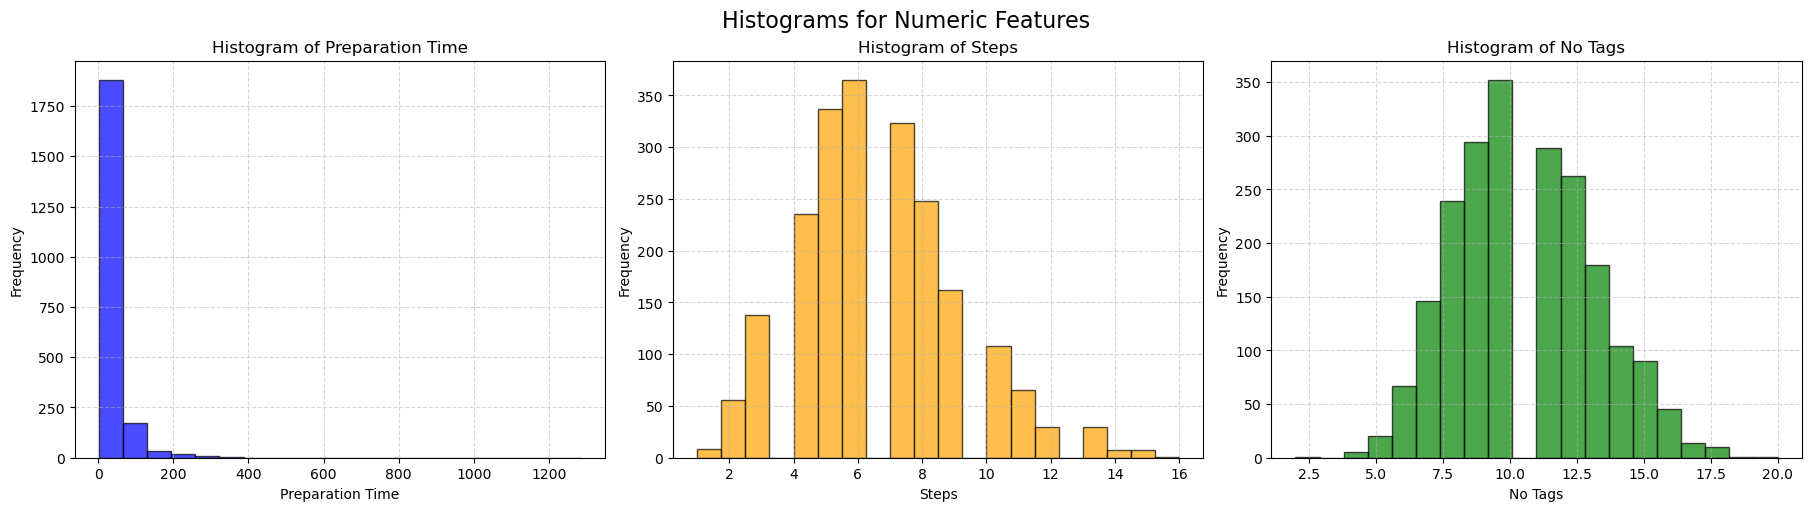

In [31]:
# Create the figure and subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 5), constrained_layout=True)

# Histogram 1: preparationtime
axs[0].hist(numeric_df['preparationtime'], bins=20, alpha=0.7, color='blue', edgecolor='black')
axs[0].set_title('Histogram of Preparation Time', fontsize=12)
axs[0].set_xlabel('Preparation Time', fontsize=10)
axs[0].set_ylabel('Frequency', fontsize=10)
axs[0].grid(True, linestyle='--', alpha=0.5)

# Histogram 2: steps
axs[1].hist(numeric_df['steps'], bins=20, alpha=0.7, color='orange', edgecolor='black')
axs[1].set_title('Histogram of Steps', fontsize=12)
axs[1].set_xlabel('Steps', fontsize=10)
axs[1].set_ylabel('Frequency', fontsize=10)
axs[1].grid(True, linestyle='--', alpha=0.5)

# Histogram 3: no_tags
axs[2].hist(numeric_df['no_tags'], bins=20, alpha=0.7, color='green', edgecolor='black')
axs[2].set_title('Histogram of No Tags', fontsize=12)
axs[2].set_xlabel('No Tags', fontsize=10)
axs[2].set_ylabel('Frequency', fontsize=10)
axs[2].grid(True, linestyle='--', alpha=0.5)

# Show the figure
plt.suptitle('Histograms for Numeric Features', fontsize=16)
plt.show()


### Correlation

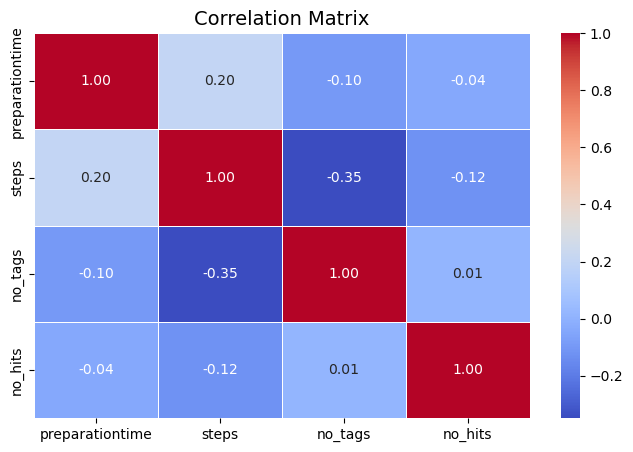

In [32]:
# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Visualize correlations using a heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix', fontsize=14)
plt.show()

> Only weak correlations detected

### PPScore

Predictive Power Score (PPS) for 'no_hits':
                 x        y  ppscore        case  is_valid_score  \
0  preparationtime  no_hits        0  regression            True   
1            steps  no_hits        0  regression            True   
2          no_tags  no_hits        0  regression            True   

                metric  baseline_score  model_score                    model  
0  mean absolute error     2002.009906  2596.672402  DecisionTreeRegressor()  
1  mean absolute error     2002.009906  2582.306360  DecisionTreeRegressor()  
2  mean absolute error     2002.009906  2594.287679  DecisionTreeRegressor()  


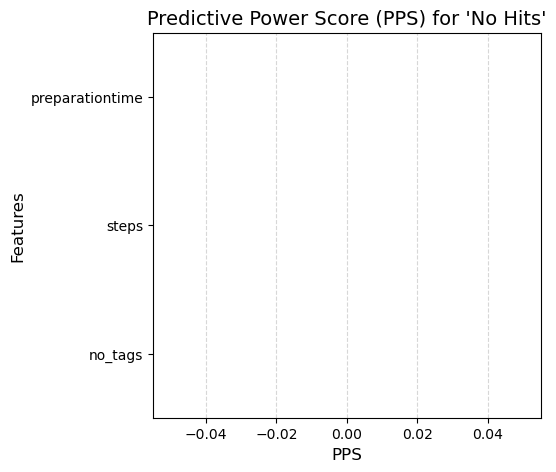

In [33]:
import ppscore as pps

# Compute PPS for all features against 'no_hits'
pps_scores = pps.predictors(numeric_df, y='no_hits')

# Display PPS results
print("Predictive Power Score (PPS) for 'no_hits':")
print(pps_scores)

# Sort PPS scores by score value
pps_scores_sorted = pps_scores.sort_values(by='ppscore', ascending=False)

# Bar plot of PPS scores
plt.figure(figsize=(5, 5))
sns.barplot(x='ppscore', y='x', data=pps_scores_sorted, palette='Blues_d')
plt.title("Predictive Power Score (PPS) for 'No Hits'", fontsize=14)
plt.xlabel('PPS', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()


**No Predictive Power (PPS = 0)**: Features (preparationtime, steps, no_tags) show no predictive relationship with no_hits.<br>
The Decision Tree Regressor performs no better than a baseline (mean prediction). <br><br>
**Model Performance**: Baseline and model errors are similar, indicating that these features do not explain variance in no_hits.<br><br>
**Business Implications**:
Current features do not effectively predict no_hits.
The analysis suggests either insufficient feature relevance or weak data patterns.

## Analyze categorical variables

In [34]:
# Exploding the 'values' column
exploded_df = aggregated_df.copy()


# Convert the tags column to actual lists
exploded_df['tags'] = exploded_df['tags'].str.split(',')

# Explode the 'tags' column
exploded_df = exploded_df.explode('tags', ignore_index=True)



In [35]:
# Print example of exploded recipe
exploded_df[exploded_df.recipe_id == '3']

,recipe_id,name,description,preparationtime,difficulty,steps,instructions,tags,no_hits,no_sessions,no_tags
14065,3,Romaine Salad with Avocado & Chicken Breast,This low-carb salad with fresh avocado and ten...,15,easy,5,"Season the chicken breast with salt, pepper an...",low_carb,1783,1574,11
14066,3,Romaine Salad with Avocado & Chicken Breast,This low-carb salad with fresh avocado and ten...,15,easy,5,"Season the chicken breast with salt, pepper an...",high_protein,1783,1574,11
14067,3,Romaine Salad with Avocado & Chicken Breast,This low-carb salad with fresh avocado and ten...,15,easy,5,"Season the chicken breast with salt, pepper an...",lunch,1783,1574,11
14068,3,Romaine Salad with Avocado & Chicken Breast,This low-carb salad with fresh avocado and ten...,15,easy,5,"Season the chicken breast with salt, pepper an...",dinner,1783,1574,11
14069,3,Romaine Salad with Avocado & Chicken Breast,This low-carb salad with fresh avocado and ten...,15,easy,5,"Season the chicken breast with salt, pepper an...",gluten_free,1783,1574,11
14070,3,Romaine Salad with Avocado & Chicken Breast,This low-carb salad with fresh avocado and ten...,15,easy,5,"Season the chicken breast with salt, pepper an...",clean_eating,1783,1574,11
14071,3,Romaine Salad with Avocado & Chicken Breast,This low-carb salad with fresh avocado and ten...,15,easy,5,"Season the chicken breast with salt, pepper an...",sugar_free,1783,1574,11
14072,3,Romaine Salad with Avocado & Chicken Breast,This low-carb salad with fresh avocado and ten...,15,easy,5,"Season the chicken breast with salt, pepper an...",salad,1783,1574,11
14073,3,Romaine Salad with Avocado & Chicken Breast,This low-carb salad with fresh avocado and ten...,15,easy,5,"Season the chicken breast with salt, pepper an...",meat,1783,1574,11
14074,3,Romaine Salad with Avocado & Chicken Breast,This low-carb salad with fresh avocado and ten...,15,easy,5,"Season the chicken breast with salt, pepper an...",500kcal,1783,1574,11


#### Create groups of tags

After analysing the tags, I will group them in simialar groups.

This groups will be useful during the analysis.

| Group                  | Tags                                                                                      |
|------------------------|-------------------------------------------------------------------------------------------|
| Dietary Preferences    | vegetarian, vegan, pescatarian, lactose_free, gluten_free, low_carb, ketogenic, low_fat, low_calorie |
| Meal Type              | lunch, dinner, breakfast, snack, on_the_go, dessert                                       |
| Calories (kcal)        | 50kcal, 100kcal, 200kcal, 300kcal, 400kcal, 500kcal, 600kcal, 700kcal                     |
| Type of Food           | fruits, vegetables, meat, fish                                                           |
| Cooking Style          | baking, salad, soup, casserole, smoothie, shake                                          |
| Nutritional Focus      | high_protein, high_fiber, detox, clean_eating                                             |
| Flavor Profile         | sweet, sugar_free                                                                        |
| Occasions              | christmas                                                                                |
| Complexity/Convenience | easy, basic, fast, few_ingredients                                                       |

In [36]:
# Define the dictionary
tag_to_group = {
    'vegetarian': 'dietary_preferences',
    'vegan': 'dietary_preferences',
    'pescatarian': 'dietary_preferences',
    'lactose_free': 'dietary_preferences',
    'gluten_free': 'dietary_preferences',
    'low_carb': 'dietary_preferences',
    'ketogenic': 'dietary_preferences',
    'low_fat': 'dietary_preferences',
    'low_calorie': 'dietary_preferences',
    'lunch': 'meal_type',
    'dinner': 'meal_type',
    'breakfast': 'meal_type',
    'snack': 'meal_type',
    'on_the_go': 'meal_type',
    'dessert': 'meal_type',
    '50kcal': 'kcal',
    '100kcal': 'kcal',
    '200kcal': 'kcal',
    '300kcal': 'kcal',
    '400kcal': 'kcal',
    '500kcal': 'kcal',
    '600kcal': 'kcal',
    '700kcal': 'kcal',
    'fruits': 'type_of_food',
    'vegetables': 'type_of_food',
    'meat': 'type_of_food',
    'fish': 'type_of_food',
    'baking': 'cooking_style',
    'salad': 'cooking_style',
    'soup': 'cooking_style',
    'casserole': 'cooking_style',
    'smoothie': 'cooking_style',
    'shake': 'cooking_style',
    'high_protein': 'nutritional_focus',
    'high_fiber': 'nutritional_focus',
    'detox': 'nutritional_focus',
    'clean_eating': 'nutritional_focus',
    'sweet': 'flavor_profile',
    'sugar_free': 'flavor_profile',
    'christmas': 'occasions',
    'easy': 'complexity_convenience',
    'basic': 'complexity_convenience',
    'fast': 'complexity_convenience',
    'few_ingredients': 'complexity_convenience'
}

# Map the 'tags' column to their respective groups
exploded_df['group'] = exploded_df['tags'].map(tag_to_group)


In [37]:
# Perform the aggregation
aggregated_stats = (
    exploded_df.groupby(['group', 'tags'])['no_hits']
    .agg(
        avg='mean',
        count='count',
        min='min',
        max='max',
        median='median',
        std='std'
    )
    .reset_index()
)

### Groups Table

In [38]:
# Plot the aggregated_stats with nice formatting, sorting group and average of views, from highest to lowest.

styled_aggregated_stats = aggregated_stats.sort_values(['group','avg'],ascending=False).style.hide(axis="index") \
    .bar(subset=['avg', 'count', 'min', 'max', 'median','std'], align='mid', color=['#d65f5f', '#8ecbfa']) \
    .format(
        formatter={
            'avg': "{:,.1f}",       # One decimal place with thousand separator
            'count': "{:,}",        # Integer with thousand separator
            'min': "{:,}",          # Integer with thousand separator
            'max': "{:,}",          # Integer with thousand separator
            'median': "{:,.1f}",    # One decimal place with thousand separator
            'std': "{:,.2f}",       # Two decimal places with thousand separator
        }
    )

# Display the styled dataframe
styled_aggregated_stats

group,tags,avg,count,min,max,median,std
type_of_food,meat,"3,210.4",373,55,"57,763",972.0,"6,547.25"
type_of_food,fish,"1,952.1",126,81,"20,243",785.5,"3,382.58"
type_of_food,vegetables,"1,782.9","1,007",19,"36,515",624.0,"3,818.14"
type_of_food,fruits,"1,772.8",431,24,"70,739",429.0,"5,242.26"
occasions,christmas,"1,264.9",198,19,"30,227",413.0,"3,366.30"
nutritional_focus,high_protein,"5,533.6",181,81,"70,739","2,087.0","9,177.58"
nutritional_focus,clean_eating,"2,723.6",613,19,"57,763",781.0,"5,778.84"
nutritional_focus,detox,"2,077.1",175,36,"32,786",526.0,"4,584.88"
nutritional_focus,high_fiber,"2,046.2",565,19,"39,152",755.0,"3,892.71"
meal_type,breakfast,"3,178.5",528,23,"70,739","1,019.0","6,739.86"


In [39]:
# Add a column for formatted avg (without decimals)
aggregated_stats['avg_formatted'] = aggregated_stats['avg'].round(0).astype(int)

# Create the treemap
fig = px.treemap(
    aggregated_stats,
    path=['group', 'tags'],  # Hierarchical levels
    values='avg',            # Size of the rectangles
    color='count',             # Color based on avg
    color_continuous_scale='Blues',  # Color scale
    title="Treemap of Groups and Tags (Average 'no_hits' and Count)",
    custom_data=['count']    # Include count in the custom data for accurate mapping
)

# Update labels to include both avg and count
fig.update_traces(
    texttemplate="<b>%{label}</b><br>Avg: %{value:.0f}<br>Count: %{customdata[0]}",
    hovertemplate="<b>%{label}</b><br>Average: %{value:.0f}<br>Count: %{customdata[0]}<br>Group: %{parent}<extra></extra>"
)

# Display the treemap
fig.show()


**Keywords balance**

The size is the average views, the color is the number of recipes for each tag.

- There are some tags with high average and low volume, we could create more recipes using them:
    - Shake, smoothie, soup, casserole, ketogenic, 50kcal, basic, high_protein, fish

- On the other hand, there are tags with high volume and low average, which we should avoid using for new recipes:
    - vegetarian, vegan, lactose_free, gluten_free, easy, sugar_free

#### Boxplots for groups

In [40]:
# Function to create a boxplot for a specific group
def plot_group_boxplot(group_name):
    # Filter for the specific group
    filtered_group = exploded_df[exploded_df['group'] == group_name].copy()

    # Compute the average for sorting
    sorted_tags = (
        filtered_group.groupby('tags')['no_hits']
        .mean()
        .sort_values(ascending=False)
        .index
    )

    # Sort the filtered group by the sorted tags
    filtered_group['tags'] = pd.Categorical(filtered_group['tags'], categories=sorted_tags, ordered=True)

    # Create the boxplot
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=filtered_group, x='tags', y='no_hits', palette='Set3')  # Palette: Set3

    # Add title and labels
    plt.title(f"Boxplot of 'no_hits' for Tags in Group: {group_name.title()} (Sorted by Average)", fontsize=14)
    plt.xlabel("Tags", fontsize=12)
    plt.ylabel("Number of Hits (no_hits)", fontsize=12)
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

    # Limit the y-axis to reduce the effect of outliers
    plt.ylim(0, filtered_group['no_hits'].quantile(0.95))  # Show up to the 95th percentile

    # Show the plot
    plt.tight_layout()
    plt.show()

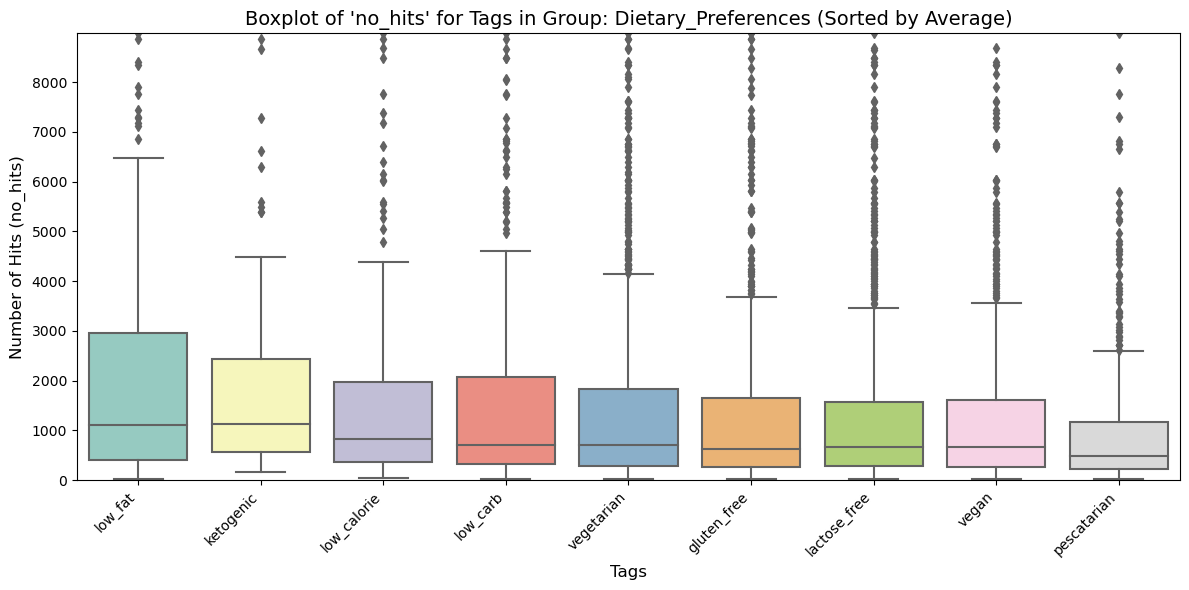

In [41]:

plot_group_boxplot('dietary_preferences')  # Replace with the desired group name

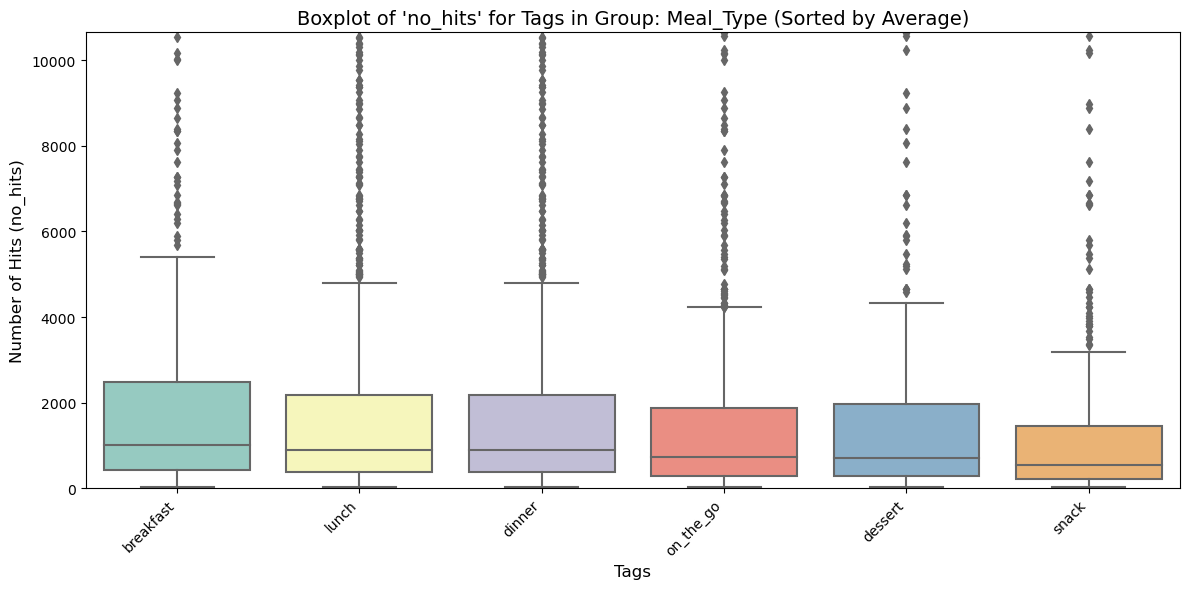

In [42]:
plot_group_boxplot('meal_type')

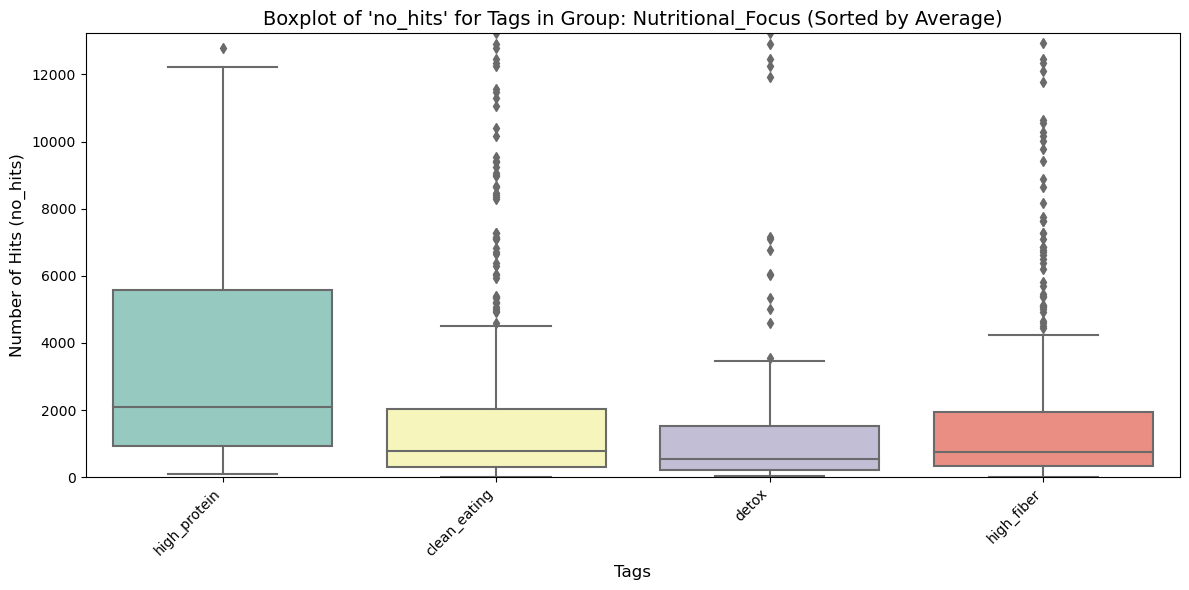

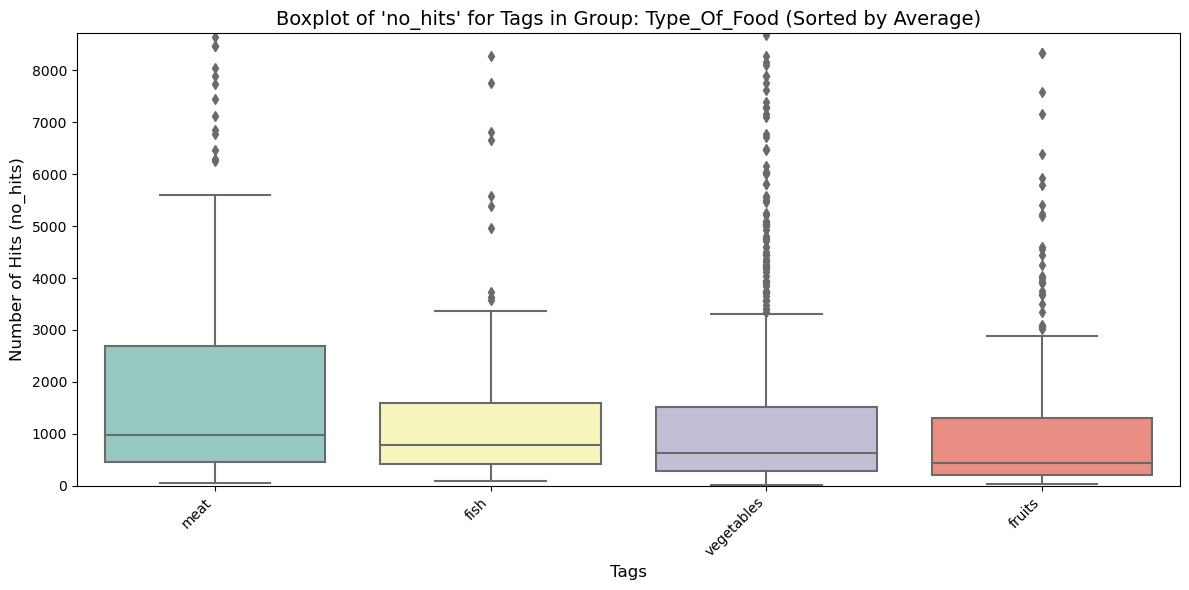

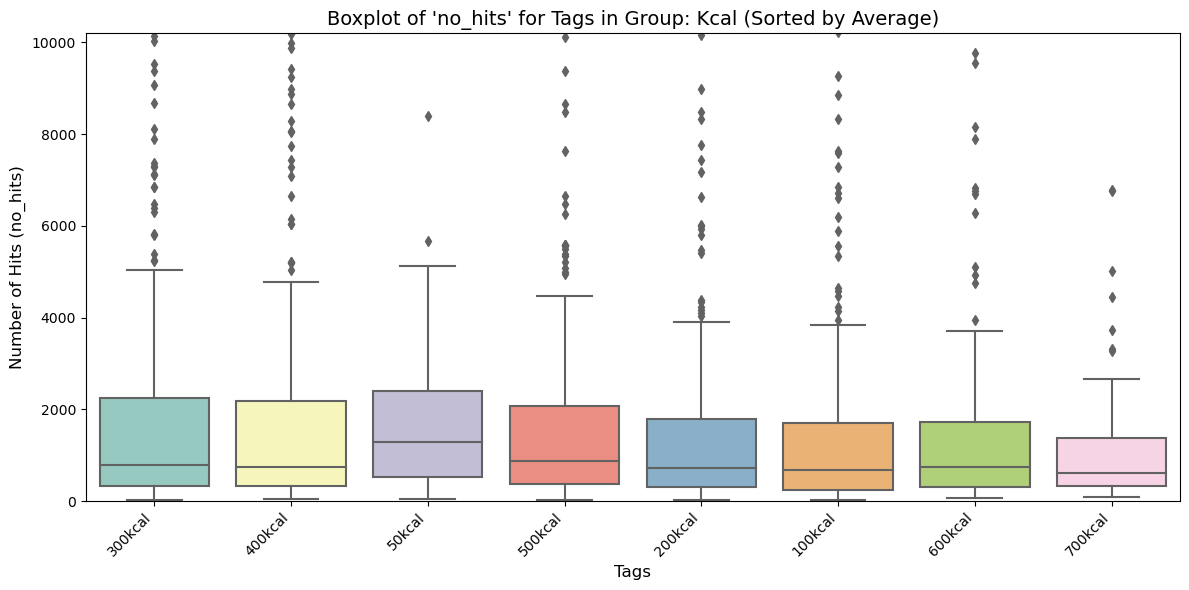

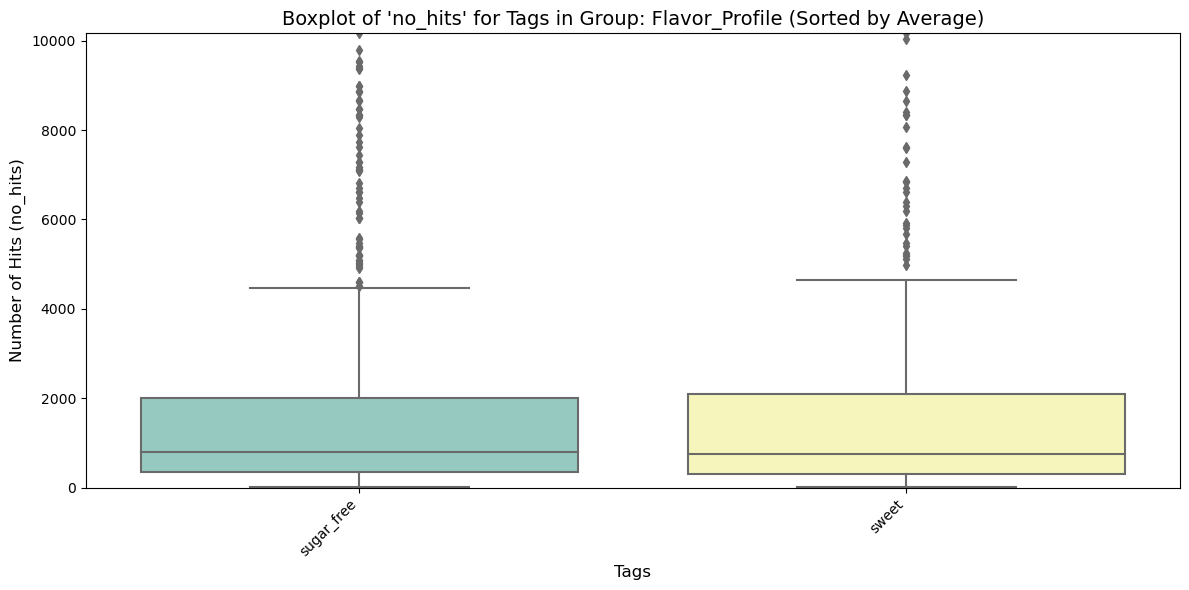

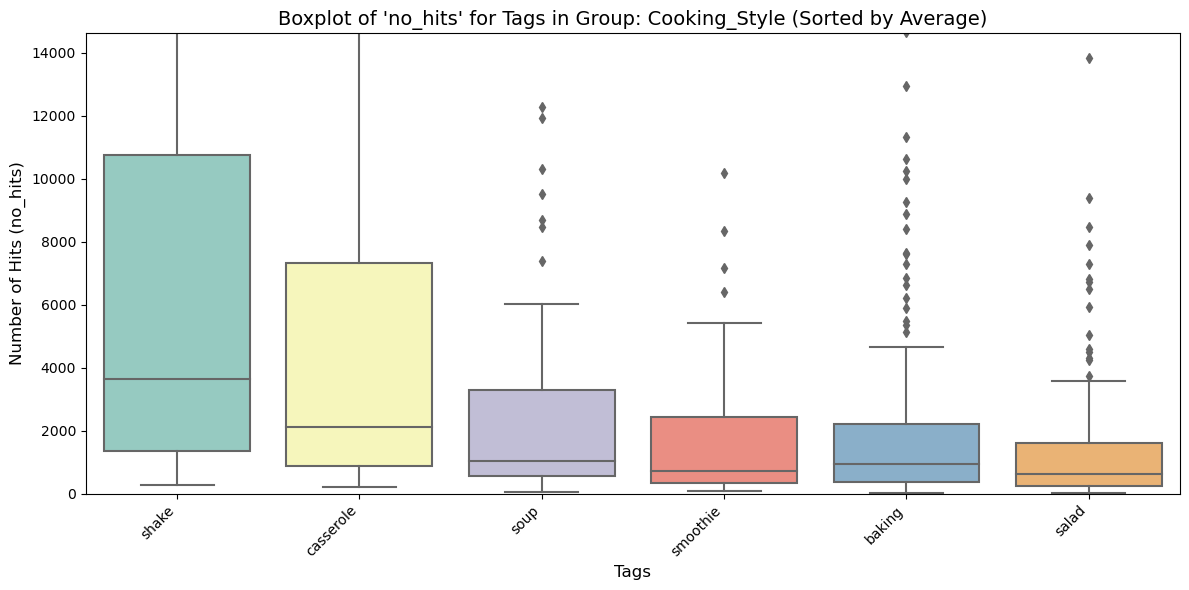

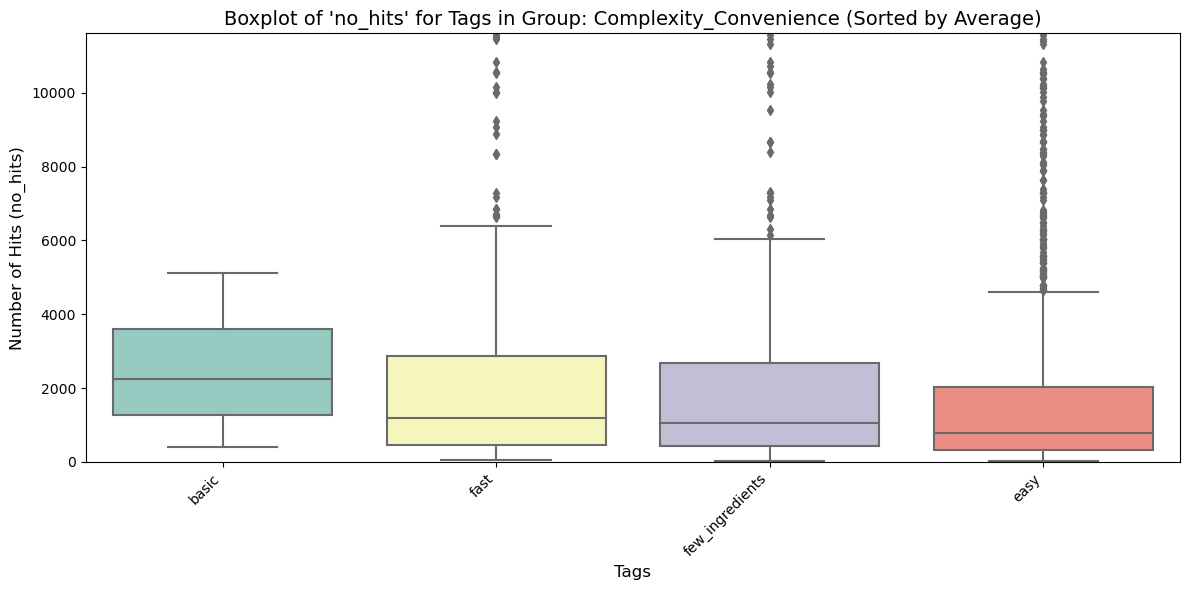

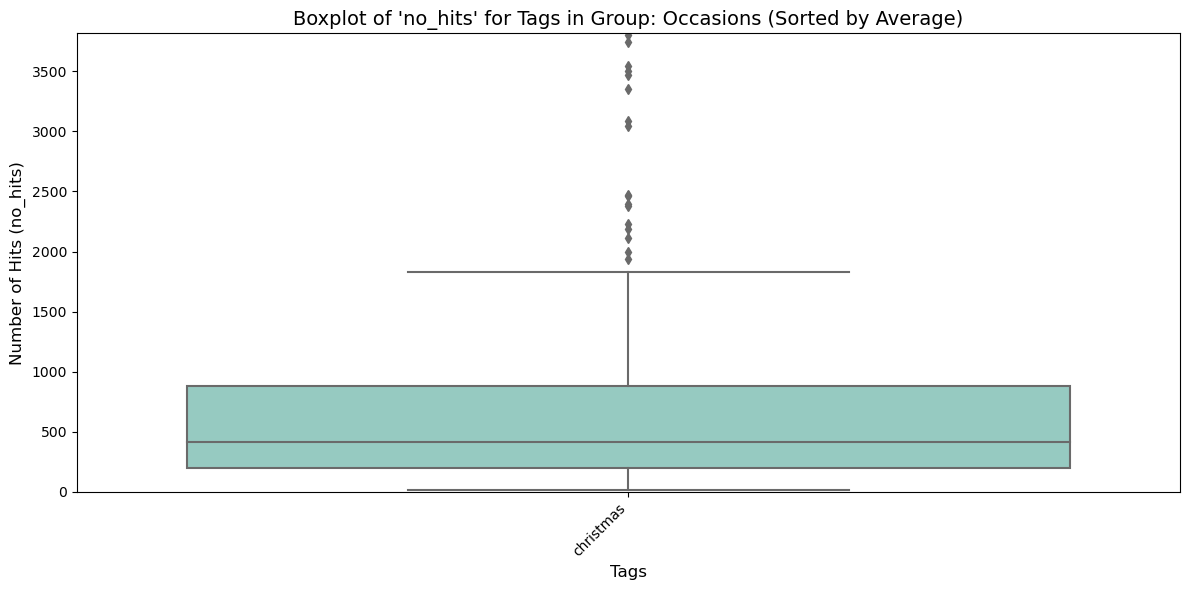

In [43]:
plot_group_boxplot('nutritional_focus')
plot_group_boxplot('type_of_food')
plot_group_boxplot('kcal')
plot_group_boxplot('flavor_profile')
plot_group_boxplot('cooking_style')
plot_group_boxplot('complexity_convenience')
plot_group_boxplot('occasions')

#### ANOVA for elements (1 tag vs all other tags)

In [44]:
import scipy.stats as stats

# Function to compute ANOVA and effect for a specific tag
def compute_tag_metrics(exploded_df, specific_tag):
    # Create two groups: rows with the specific tag and rows without it
    with_tag = exploded_df[exploded_df['tags'] == specific_tag]['no_hits']
    without_tag = exploded_df[exploded_df['tags'] != specific_tag]['no_hits']
    
    # Perform one-way ANOVA
    f_stat, p_value = stats.f_oneway(with_tag, without_tag)
    
    # Calculate the effect: difference in means
    mean_with_tag = np.mean(with_tag)
    mean_without_tag = np.mean(without_tag)
    effect = mean_with_tag - mean_without_tag
    
    # Return the metrics as a dictionary
    return {
        'tag': specific_tag,
        'f_stat': f_stat,
        'p_value': p_value,
        'mean_with_tag': mean_with_tag,
        'mean_without_tag': mean_without_tag,
        'effect': effect
    }

# Run the function for every unique tag and collect results in a dataframe
def analyze_all_tags(exploded_df):
    # List to store results
    results = []
    
    # Iterate through unique tags
    for tag in exploded_df['tags'].unique():
        metrics = compute_tag_metrics(exploded_df, tag)
        results.append(metrics)
    
    # Convert results to a dataframe
    results_df = pd.DataFrame(results)
    
    # Sort by p_value (ascending) and reset index
    results_df = results_df.sort_values(by='p_value').reset_index(drop=True)
    
    return results_df

In [45]:
metrics_df = analyze_all_tags(exploded_df)


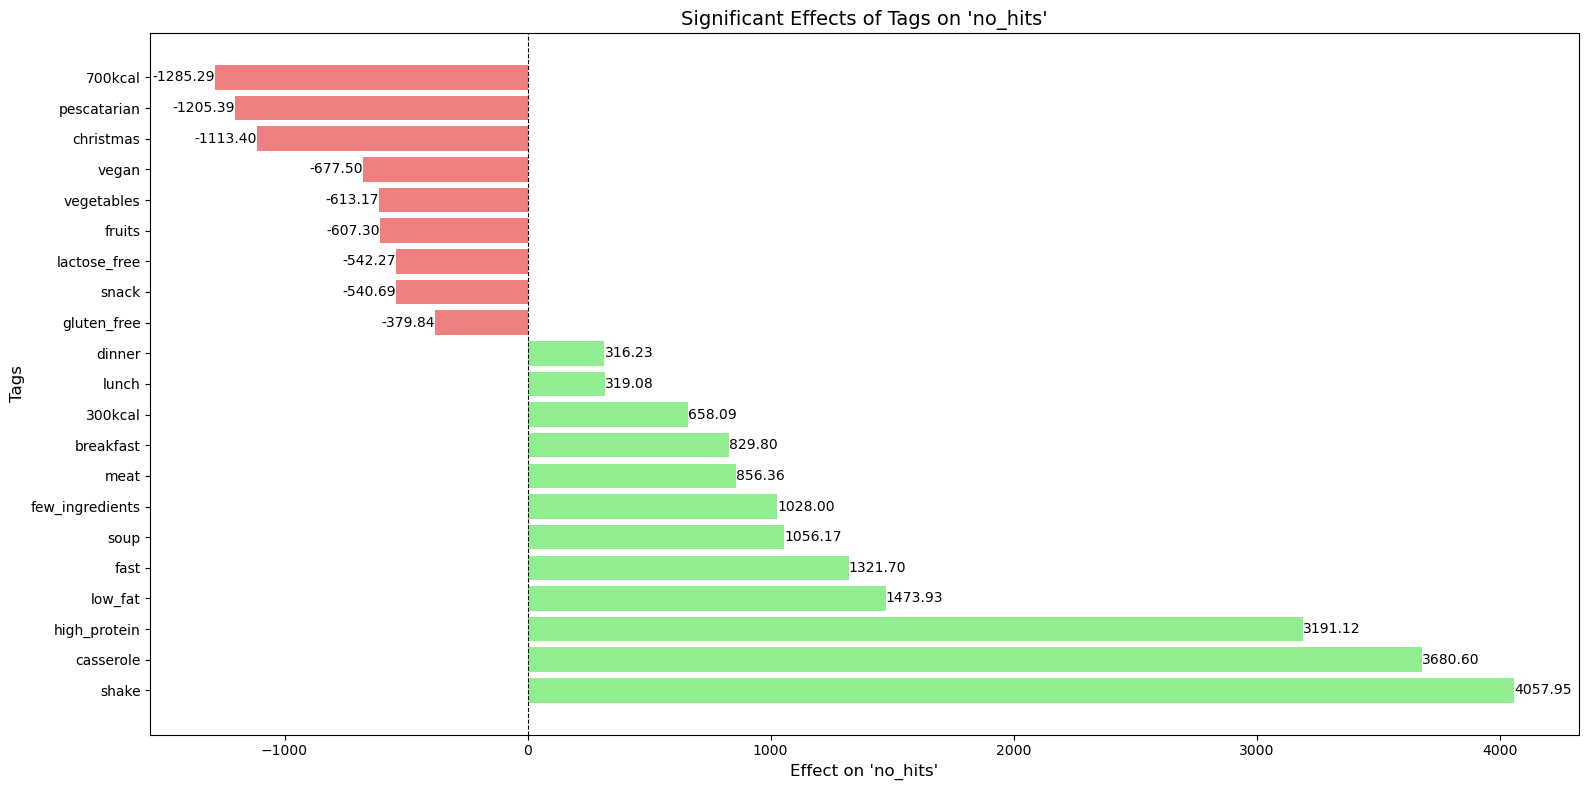

In [46]:
# Filter for significant metrics and sort by effect
significant_metrics = metrics_df[metrics_df.p_value < 0.05].sort_values('effect', ascending=False)

# Define softer colors
positive_color = '#90ee90'  # Light green
negative_color = '#f08080'  # Light red

# Plotting
plt.figure(figsize=(16, 8))
bars = plt.barh(
    y=significant_metrics['tag'],
    width=significant_metrics['effect'],
    color=np.where(significant_metrics['effect'] > 0, positive_color, negative_color)
)

# Add labels to the bars
for bar, effect in zip(bars, significant_metrics['effect']):
    plt.text(
        bar.get_width() + (0.2 if effect > 0 else -0.2),  # Adjust label position
        bar.get_y() + bar.get_height() / 2,
        f"{effect:.2f}",
        va='center',
        ha='left' if effect > 0 else 'right',
        color='black'
    )

# Center y-axis at 0
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')

# Titles and labels
plt.title("Significant Effects of Tags on 'no_hits'", fontsize=14)
plt.xlabel("Effect on 'no_hits'", fontsize=12)
plt.ylabel("Tags", fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()


### ANOVA for difficulty

In [47]:
# Function to compute ANOVA and effect for a specific difficulty level
def compute_difficulty_metrics(aggregated_df, specific_difficulty):
    # Create two groups: rows with the specific difficulty and rows without it
    with_difficulty = aggregated_df[aggregated_df['difficulty'] == specific_difficulty]['no_hits']
    without_difficulty = aggregated_df[aggregated_df['difficulty'] != specific_difficulty]['no_hits']
    
    # Perform one-way ANOVA
    f_stat, p_value = stats.f_oneway(with_difficulty, without_difficulty)
    
    # Calculate the effect: difference in means
    mean_with_difficulty = np.mean(with_difficulty)
    mean_without_difficulty = np.mean(without_difficulty)
    effect = mean_with_difficulty - mean_without_difficulty
    
    # Return the metrics as a dictionary
    return {
        'difficulty': specific_difficulty,
        'f_stat': f_stat,
        'p_value': p_value,
        'mean_with_difficulty': mean_with_difficulty,
        'mean_without_difficulty': mean_without_difficulty,
        'effect': effect
    }

# Function to analyze all difficulty levels and generate a dataframe
def analyze_all_difficulties(aggregated_df):
    # List to store results
    results = []
    
    # Iterate through unique difficulty levels
    for difficulty in aggregated_df['difficulty'].unique():
        metrics = compute_difficulty_metrics(aggregated_df, difficulty)
        results.append(metrics)
    
    # Convert results to a dataframe
    results_df = pd.DataFrame(results)
    
    # Sort by p_value (ascending) and reset index
    results_df = results_df.sort_values(by='p_value').reset_index(drop=True)
    
    return results_df

# Run the analysis
difficulty_metrics_df = analyze_all_difficulties(aggregated_df)

# Filter significant effects and sort by effect
significant_difficulty_metrics = difficulty_metrics_df[difficulty_metrics_df.p_value < 0.05].sort_values('effect', ascending=False)

In [48]:
difficulty_metrics_df

,difficulty,f_stat,p_value,mean_with_difficulty,mean_without_difficulty,effect
0,hard,1.348150,0.245733,1012.523810,2367.191043,-1354.667234
1,easy,0.268474,0.604411,2390.565952,2256.309811,134.256141
2,normal,0.069405,0.792231,2302.951786,2372.015385,-69.063599


> The p_values are high, indicating that difficulty doesn't affect the no_hits with statistic significance.

### ANOVA for groups (1 tag vs its group)

In [49]:
# Function to compute ANOVA and effect for a specific tag compared to other tags in the same group
def compute_tag_metrics_within_group(exploded_df, specific_tag):
    # Filter the group of the specific tag
    group_name = exploded_df[exploded_df['tags'] == specific_tag]['group'].iloc[0]
    group_df = exploded_df[exploded_df['group'] == group_name].copy()

    # Create two groups: rows with the specific tag and rows with other tags in the same group
    with_tag = group_df[group_df['tags'] == specific_tag]['no_hits']
    without_tag = group_df[group_df['tags'] != specific_tag]['no_hits']

    # Perform one-way ANOVA
    f_stat, p_value = stats.f_oneway(with_tag, without_tag)

    # Calculate the effect: difference in means
    mean_with_tag = np.mean(with_tag)
    mean_without_tag = np.mean(without_tag)
    effect = mean_with_tag - mean_without_tag

    # Return the metrics as a dictionary
    return {
        'group': group_name,
        'tag': specific_tag,
        'f_stat': f_stat,
        'p_value': p_value,
        'mean_with_tag': mean_with_tag,
        'mean_without_tag': mean_without_tag,
        'effect': effect
    }

# Function to analyze all tags within their respective groups
def analyze_all_tags_within_groups(exploded_df):
    # List to store results
    results = []

    # Iterate through unique tags
    for tag in exploded_df['tags'].unique():
        metrics = compute_tag_metrics_within_group(exploded_df, tag)
        results.append(metrics)

    # Convert results to a dataframe
    results_df = pd.DataFrame(results)

    # Sort by p_value (ascending) and reset index
    results_df = results_df.sort_values(by='p_value').reset_index(drop=True)

    return results_df

# Example Usage
tag_group_metrics_df = analyze_all_tags_within_groups(exploded_df)

# Display the resulting dataframe
tag_group_metrics_df


/Users/brunoprado/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:3861: DegenerateDataWarning:

at least one input has length 0



,group,tag,f_stat,p_value,mean_with_tag,mean_without_tag,effect
0,dietary_preferences,low_fat,53.309050,3.158423e-13,3813.451835,2025.772836,1787.678999
1,nutritional_focus,high_protein,51.460756,1.133105e-12,5533.563536,2357.103474,3176.460062
2,type_of_food,meat,26.662912,2.671021e-07,3210.396783,1793.778772,1416.618010
3,cooking_style,casserole,25.893521,4.577167e-07,6032.450000,2589.421462,3443.028538
4,dietary_preferences,pescatarian,19.391770,1.080184e-05,1189.947791,2205.897710,-1015.949919
5,complexity_convenience,easy,16.609462,4.751312e-05,2390.565952,3500.229371,-1109.663419
6,nutritional_focus,high_fiber,13.111108,3.031119e-04,2046.176991,3131.729618,-1085.552627
7,meal_type,breakfast,9.086007,2.589089e-03,3178.503788,2408.806032,769.697755
8,meal_type,snack,8.001751,4.692453e-03,1840.198058,2570.553319,-730.355261
9,dietary_preferences,vegan,7.658316,5.665688e-03,1719.809674,2198.836540,-479.026866


In [50]:
significant_metrics = tag_group_metrics_df[tag_group_metrics_df.p_value < 0.05].sort_values('effect', ascending=False)
significant_metrics


,group,tag,f_stat,p_value,mean_with_tag,mean_without_tag,effect
20,cooking_style,shake,5.145419,2.359472e-02,6423.055556,2969.142069,3453.913487
3,cooking_style,casserole,25.893521,4.577167e-07,6032.450000,2589.421462,3443.028538
1,nutritional_focus,high_protein,51.460756,1.133105e-12,5533.563536,2357.103474,3176.460062
0,dietary_preferences,low_fat,53.309050,3.158423e-13,3813.451835,2025.772836,1787.678999
2,type_of_food,meat,26.662912,2.671021e-07,3210.396783,1793.778772,1416.618010
13,complexity_convenience,fast,6.817566,9.086447e-03,3675.067194,2624.664168,1050.403026
12,kcal,300kcal,7.302576,6.941109e-03,3014.794937,2211.092777,803.702159
17,complexity_convenience,few_ingredients,6.034218,1.410615e-02,3376.070455,2588.905182,787.165273
7,meal_type,breakfast,9.086007,2.589089e-03,3178.503788,2408.806032,769.697755
14,dietary_preferences,low_calorie,6.397681,1.144831e-02,2807.627628,2102.073056,705.554572


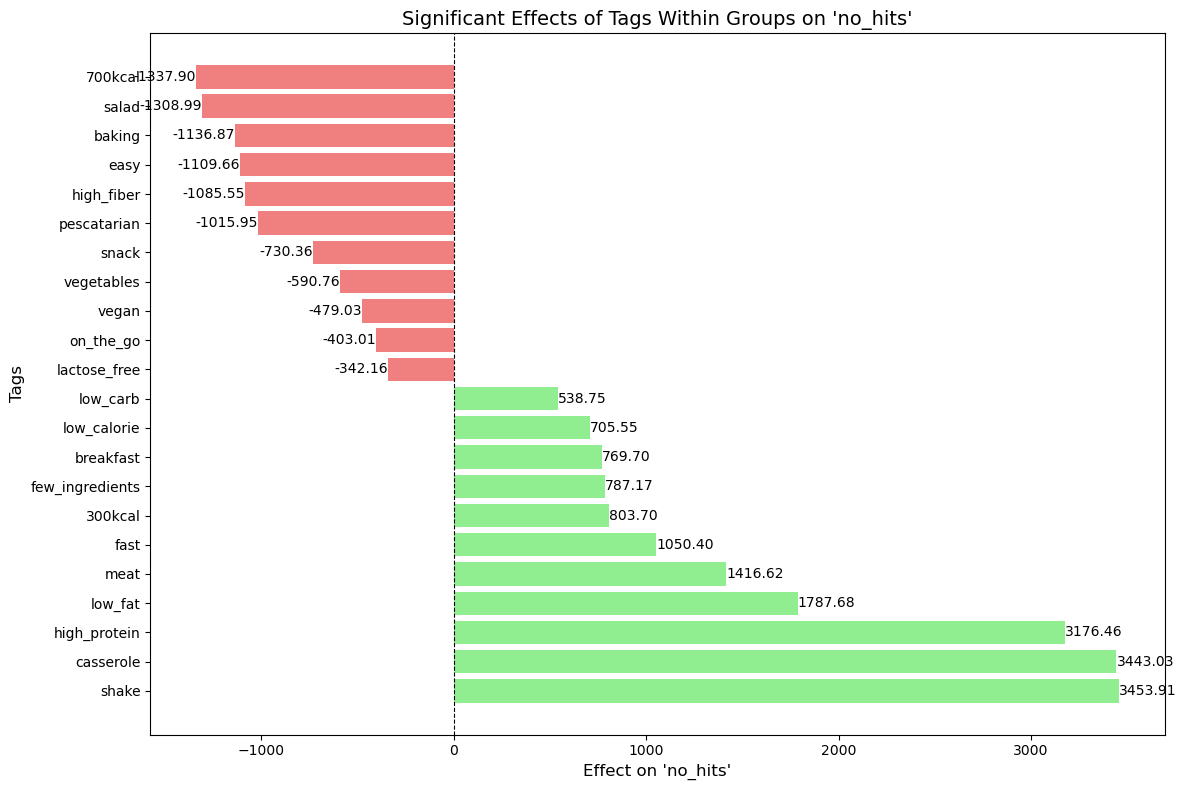

In [51]:
# Function to plot significant tag effects within groups
def plot_tag_effects_within_groups(metrics_df):
    # Filter for significant results and sort by effect
    significant_metrics = metrics_df[metrics_df.p_value < 0.05].sort_values('effect', ascending=False)
    
    if significant_metrics.empty:
        print("No significant effects found.")
        return

    # Define softer colors
    positive_color = '#90ee90'  # Light green
    negative_color = '#f08080'  # Light red

    # Plotting
    plt.figure(figsize=(12, 8))
    bars = plt.barh(
        y=significant_metrics['tag'],
        width=significant_metrics['effect'],
        color=np.where(significant_metrics['effect'] > 0, positive_color, negative_color)
    )

    # Add labels to the bars
    for bar, effect in zip(bars, significant_metrics['effect']):
        plt.text(
            bar.get_width() + (0.2 if effect > 0 else -0.2),  # Adjust label position
            bar.get_y() + bar.get_height() / 2,
            f"{effect:.2f}",
            va='center',
            ha='left' if effect > 0 else 'right',
            color='black'
        )

    # Center y-axis at 0
    plt.axvline(0, color='black', linewidth=0.8, linestyle='--')

    # Titles and labels
    plt.title("Significant Effects of Tags Within Groups on 'no_hits'", fontsize=14)
    plt.xlabel("Effect on 'no_hits'", fontsize=12)
    plt.ylabel("Tags", fontsize=12)

    # Adjust layout
    plt.tight_layout()
    plt.show()

# Apply
plot_tag_effects_within_groups(tag_group_metrics_df)

In [52]:
def plot_tag_effects_within_groups(metrics_df):
    # Ensure no NaN or inf values (redundant here since your data is clean)
    metrics_df = metrics_df.replace([np.inf, -np.inf], np.nan).dropna(subset=['effect', 'p_value'])

    # Get unique groups
    unique_groups = metrics_df['group'].unique()
    num_groups = len(unique_groups)

    # Calculate rows needed for 2 columns
    ncols = 2
    nrows = math.ceil(num_groups / ncols)

    # Set up subplots
    fig, axes = plt.subplots(nrows, ncols, figsize=(16, 3 * nrows), sharex=True)
    axes = axes.flatten()  # Flatten to easily iterate

    # Define colors
    positive_color = '#90ee90'  # Light green
    negative_color = '#f08080'  # Light red
    neutral_color = '#d3d3d3'   # Grey for non-significant

    for ax, group in zip(axes, unique_groups):
        # Filter and sort data for the current group by effect
        group_data = metrics_df[metrics_df['group'] == group].sort_values(by='effect', ascending=False)

        # Skip if the group is empty
        if group_data.empty:
            ax.axis('off')  # Turn off the axis for empty groups
            continue

        # Determine colors based on significance
        colors = np.where(group_data['p_value'] < 0.05,
                          np.where(group_data['effect'] > 0, positive_color, negative_color),
                          neutral_color)

        # Plot horizontal bars
        bars = ax.barh(
            y=group_data['tag'],
            width=group_data['effect'],
            color=colors
        )

        # Add labels to the bars
        for bar, effect in zip(bars, group_data['effect']):
            ax.text(
                bar.get_width() + (0.2 if effect > 0 else -0.2),  # Adjust label position
                bar.get_y() + bar.get_height() / 2,
                f"{effect:.2f}",
                va='center',
                ha='left' if effect > 0 else 'right',
                color='black'
            )

        # Add a vertical line at x=0
        ax.axvline(0, color='black', linewidth=0.8, linestyle='--')

        # Titles and labels
        ax.set_title(f"Group: {group.title()}", fontsize=14)
        ax.set_ylabel("Tags", fontsize=12)

    # Hide unused subplots
    for ax in axes[len(unique_groups):]:
        ax.axis('off')

    # Set shared x-label
    fig.text(0.5, 0.04, "Effect on 'no_hits'", ha='center', fontsize=12)

    # Adjust layout
    plt.tight_layout()
    plt.show()

    fig.savefig("/Users/brunoprado/Documents/portfolio/docs/projects/project2/anova_groups.png",
             format="png", dpi=300, bbox_inches="tight")


I applied ANOVA for each tag against the group to verify if there is an effect on views average and if the result is statistically significant.

The number represents the effect on the views average:

> `avg views for recipes with the tag` - `avg views for the other recipes in the same group`

Legend:

Green: positive impact with statistic significance.

Red: negative impact with statistic significance.

Grey: No statistic significance.

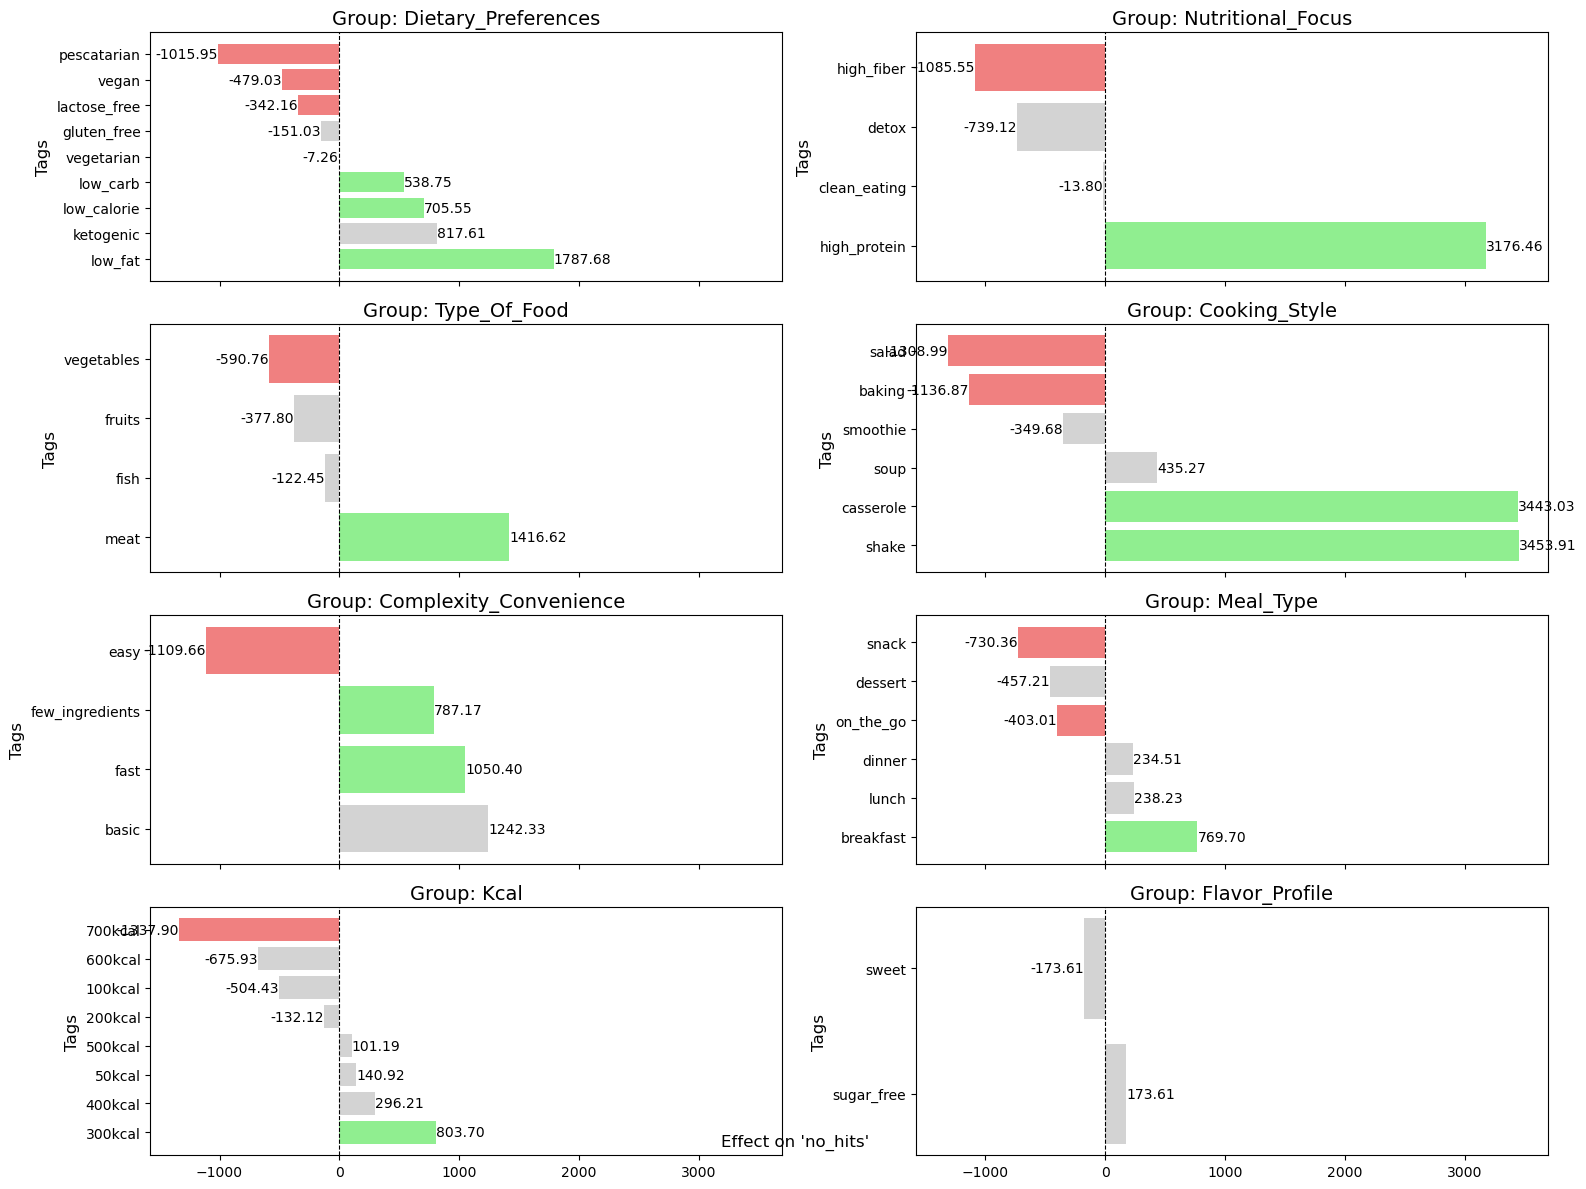

In [53]:
plot_tag_effects_within_groups(tag_group_metrics_df)